Project: Analyzing Aviation Risks for Aircraft Selection
         Objective:
The goal is to identify the safest aircraft for purchase based on accident records, fatalities, and risk analysis. We will analyze the dataset to provide actionable insights to help the company make informed decisions when purchasing aircraft.


Step 1: Import Required Libraries

In [45]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load the Dataset
I will load the dataset into a pandas DataFrame and check the first few rows to understand the structure.


In [46]:
# Load the dataset (update the path)
df = pd.read_csv('AviationData.csv')
df2 = pd.read_csv('USState_Codes.csv')

# Show the first few rows of the dataset
df.head()


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Step 3: Data Exploration and Cleaning
I need to clean the data by handling missing values, converting categorical columns, and ensuring the data is in the right format for analysis

In [47]:
# Check for missing values
print(df.isnull().sum())


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [48]:
# Handle missing values by filling or dropping
df = df.fillna(0)  # Fill all missing values with 0 Filling with zero works best for count-like data such as fatalities, injuries, and accident counts, where missing values indicate no occurrence.

df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces from column names

# Drop rows with missing values in critical columns like 'Total.Fatal.Injuries' and 'Purpose.of.flight'
df.dropna(subset=['Total.Fatal.Injuries', 'Purpose.of.flight', 'Air.carrier'], inplace=True)

# Convert relevant categorical columns to categories
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype('category')
df['Air.carrier'] = df['Air.carrier'].astype('category')
df['Investigation.Type'] = df['Investigation.Type'].astype('category')

# Verify changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Event.Id                88889 non-null  object  
 1   Investigation.Type      88889 non-null  category
 2   Accident.Number         88889 non-null  object  
 3   Event.Date              88889 non-null  object  
 4   Location                88889 non-null  object  
 5   Country                 88889 non-null  object  
 6   Latitude                88889 non-null  object  
 7   Longitude               88889 non-null  object  
 8   Airport.Code            88889 non-null  object  
 9   Airport.Name            88889 non-null  object  
 10  Injury.Severity         88889 non-null  object  
 11  Aircraft.damage         88889 non-null  object  
 12  Aircraft.Category       88889 non-null  object  
 13  Registration.Number     88889 non-null  object  
 14  Make                  

Step 4: Exploratory Data Analysis (EDA)
A. Most Frequent Aircraft Makes by Accidents

In [49]:
# Count accidents by aircraft make
accident_counts = df['Make'].value_counts().head(10)

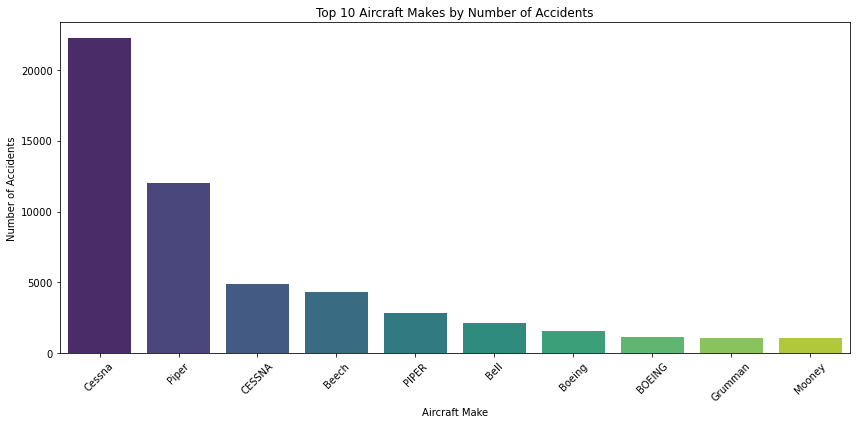

In [50]:
# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


B. Total Fatalities by Aircraft Make

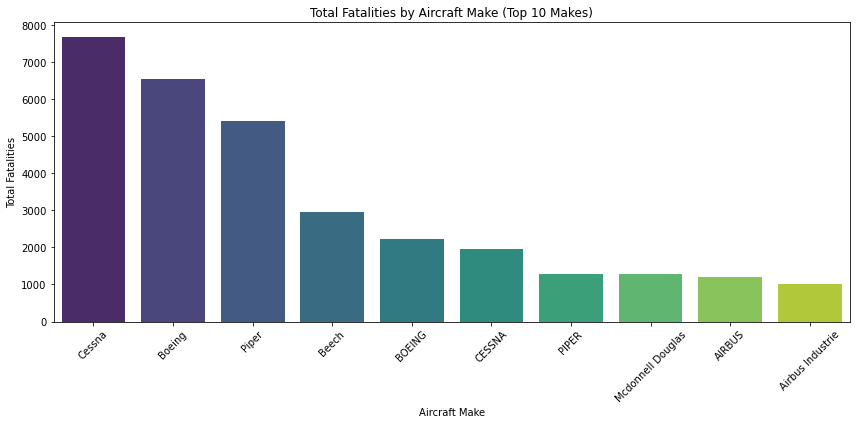

In [51]:
# Group by 'Make' and sum the total fatalities (or serious injuries)
fatalities_by_make = df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=fatalities_by_make.index, y=fatalities_by_make.values, palette='viridis')  # You can change the palette
plt.title('Total Fatalities by Aircraft Make (Top 10 Makes)')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c. Number of Accidents Over Time (by Year)

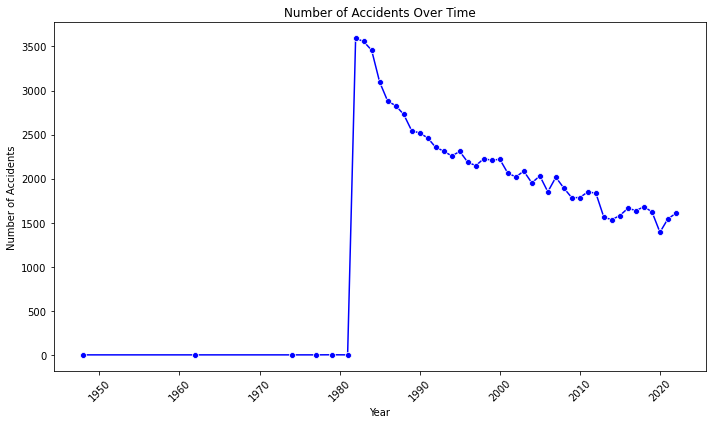

In [52]:

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year from the 'Event.Date' column
df['Year'] = df['Event.Date'].dt.year

# Drop rows with missing year
df = df.dropna(subset=['Year'])

# Count the number of accidents per year
accidents_by_year = df['Year'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values, marker='o', color='b', palette='coolwarm')
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Step 5: Risk Analysis and Score Calculation

A. Calculate Risk Scores by Aircraft Make
To calculate risk scores, we will use the number of fatalities and accidents. Higher fatalities combined with frequent accidents indicate a higher risk.

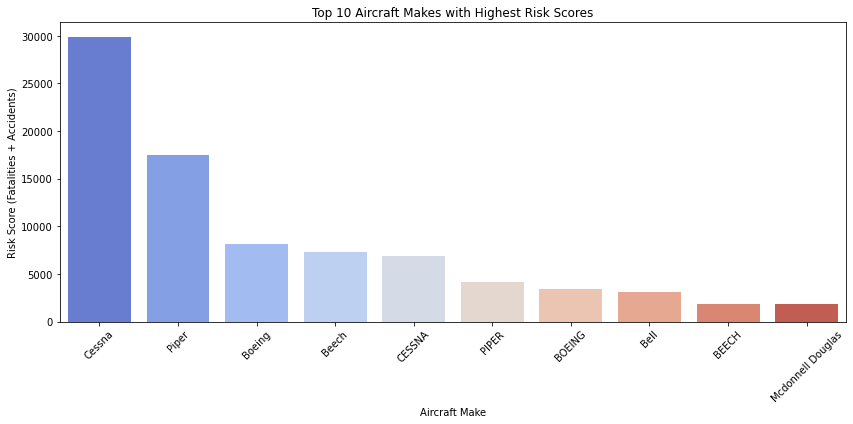

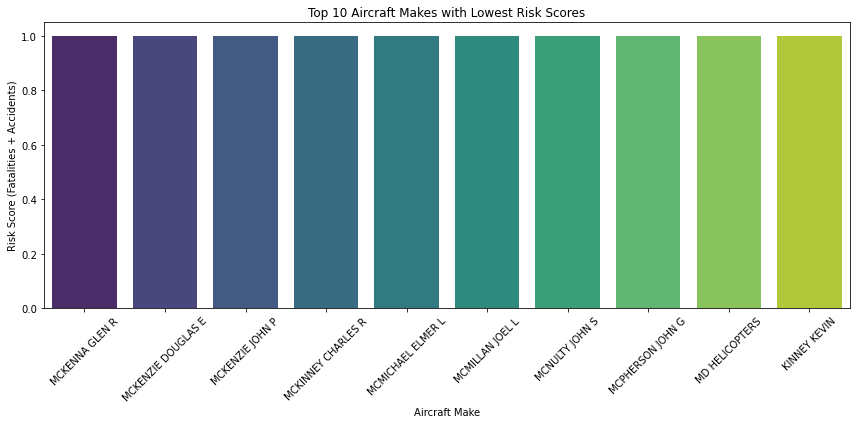

In [53]:
# Calculate the number of accidents for each aircraft make
accidents_by_make = df.groupby('Make')['Event.Id'].count()

# Calculate total fatalities for each aircraft make
fatalities_by_make = df.groupby('Make')['Total.Fatal.Injuries'].sum()

# Combine the two factors to create a risk score (total fatalities + number of accidents)
risk_score_by_make = fatalities_by_make + accidents_by_make

# Sort by risk score, highest first
risk_score_by_make_sorted = risk_score_by_make.sort_values(ascending=False)

# Plot the top 10 highest risk aircraft makes
plt.figure(figsize=(12, 6))
sns.barplot(x=risk_score_by_make_sorted.head(10).index, y=risk_score_by_make_sorted.head(10).values, palette='coolwarm')
plt.title('Top 10 Aircraft Makes with Highest Risk Scores')
plt.xlabel('Aircraft Make')
plt.ylabel('Risk Score (Fatalities + Accidents)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 10 lowest risk aircraft makes
plt.figure(figsize=(12, 6))
sns.barplot(x=risk_score_by_make_sorted.tail(10).index, y=risk_score_by_make_sorted.tail(10).values, palette='viridis')
plt.title('Top 10 Aircraft Makes with Lowest Risk Scores')
plt.xlabel('Aircraft Make')
plt.ylabel('Risk Score (Fatalities + Accidents)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Step 6: Recommendations for Aircraft Purchase
Recommendations:
Aircraft Makes with Lower Risk Scores:
-	Aircraft models with the lowest risk scores should be prioritized for purchase, as they have fewer accidents and fatalities. These models are statistically safer and would provide a higher level of safety for the company.
Aircraft Makes with Higher Risk Scores:
-	Aircraft models with higher risk scores should be avoided, as they are associated with more accidents and fatalities.
Example:
Safer Options:
-	Models like Aircraft Make MCKENNA GLEN R has the lowest risk scores, making them the top choices for purchase.
Avoid:
-	Models like Aircraft Cessna should be avoided as they have a significantly higher risk score.



Step 7: Conclusion and Next Steps
Conclusion:
Based on the analysis, I can confidently recommend purchasing aircraft with low accident rates and fatalities. Aircraft with high accident rates and fatalities should be avoided to ensure the safety and reputation of the company as it enters the aviation industry.
Next Steps:
•	Further analysis could be done to refine risk scores by including other factors like maintenance history, flight hours, and weather conditions during accidents.
•	More detailed statistical analysis could be performed to identify any significant correlations between aircraft make and accident severity.

Final Thoughts:
This analysis serves as a comprehensive review of the risks associated with different aircraft. By combining data on accidents, fatalities, and risk scores, the company can make a more informed decision when selecting aircraft to purchase.
